<a href="https://colab.research.google.com/github/Abraham-Deng/-Hello_world-/blob/main/AbrahamDeng_AI_Sports_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Abraham Aruai Thel Deng

Sub: ML Model Development and Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pickle
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import seaborn as sns
sns.set(font_scale = 1.25)
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/players_22.csv")
data_for_test = pd.read_csv("/content/drive/MyDrive/players_21.csv")

**1. Demonstrate the data preparation & feature extraction process **

In [ ]:
#QN 1.

while data.shape[0] > data_for_test.shape[0]:
    data = data.drop(data.index[-1])

In [ ]:
print(data.shape)
print(data_for_test.shape)

(18944, 110)
(18944, 110)


In [ ]:
# Statistics for each column
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.887000e+04,18883.000000,18944.000000,18944.000000,18944.000000,18883.000000,18883.00000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2080.000000
mean,231036.354043,66.026394,71.226615,2.893348e+06,9146.107610,25.293655,181.332295,75.005595,50204.585182,1.35614,...,58.205025,46.825169,48.253642,46.077755,16.390519,16.179582,16.039696,16.221970,16.482844,36.700962
std,27007.695291,6.621113,5.976746,7.665191e+06,19594.353009,4.727798,6.862259,7.058886,54344.352840,0.74805,...,12.011027,20.180810,21.235840,20.777518,17.603145,16.862003,16.580108,17.098155,17.911716,10.690720
min,41.000000,51.000000,51.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.00000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,213998.250000,62.000000,67.000000,5.000000e+05,1000.000000,21.000000,176.000000,70.000000,468.000000,1.00000,...,51.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,236022.500000,66.000000,71.000000,1.000000e+06,3000.000000,25.000000,181.000000,75.000000,1934.000000,1.00000,...,59.000000,53.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,253052.250000,70.000000,75.000000,2.100000e+06,8000.000000,29.000000,186.000000,80.000000,111092.000000,1.00000,...,66.000000,64.000000,66.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.00000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
#Convert data to correct types
#Fetching all column names related to positions
cols = data.iloc[:,78:105].columns
cols = data_for_test.iloc[:,78:105].columns

#Replacing null values
for col in cols:
    data[col].fillna('0+0',inplace=True)
    data_for_test[col].fillna('0+0',inplace=True)

#Function to convert
def convert(val):
    val = str(val)
    if '+' in val:
      li = val.split('+')
      return (int(li[0])+int(li[1]))
    elif '-' in val:
      li = val.split('-')
      return (int(li[0])+int(li[1]))
    elif '.' in val:
      li = val.split('.')
      return (int(li[0])+int(li[1]))
    else:
      return int(val)

#Applying function for conversion
for col in cols:
    data[col] = data[col].apply(convert)
    data_for_test[col] = data_for_test[col].apply(convert)

In [ ]:
#Replacing null values
data['work_rate'].fillna(method='ffill',inplace=True)
data_for_test['work_rate'].fillna(method='ffill',inplace=True)

def work_rate_attacking_convert(work_rate):
    rate = work_rate.split('/')[0]
    return rate

def work_rate_defending_convert(work_rate):
    rate = work_rate.split('/')[1][1:]
    return rate

data['Attacking_Work_Rate'] = data['work_rate'].apply(work_rate_attacking_convert)
data['Defending_Work_Rate'] = data['work_rate'].apply(work_rate_defending_convert)
data_for_test['Attacking_Work_Rate'] = data_for_test['work_rate'].apply(work_rate_attacking_convert)
data_for_test['Defending_Work_Rate'] = data_for_test['work_rate'].apply(work_rate_defending_convert)

data.drop('work_rate',axis=1,inplace=True)
data_for_test.drop('work_rate',axis=1,inplace=True)

In [ ]:
#feature engineering
# Getting a value counts of all nations
count = data['nationality_name'].value_counts()

li = list(count[count >= 250].index)

def nation_cat(nation):
    if nation in li:
        return 'Major'
    else:
        return 'Minor'

#Applying function to categorize
data['nationality_name'] = data['nationality_name'].apply(nation_cat)
data_for_test['nationality_name'] = data_for_test['nationality_name'].apply(nation_cat)

In [ ]:
cols = ['nationality_name','club_name','league_name','club_position','player_positions','nation_position','Attacking_Work_Rate', 'Defending_Work_Rate']

labelencoder = LabelEncoder()

for col in cols:
    data[col] = labelencoder.fit_transform(data[col])
    data_for_test[col] = labelencoder.fit_transform(data_for_test[col])

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [ ]:
data.drop(['sofifa_id','player_url','club_team_id','short_name','long_name','dob','club_jersey_number','nation_jersey_number','club_loaned_from','club_joined','club_contract_valid_until','nationality_id','nation_team_id','nation_jersey_number','preferred_foot','body_type','real_face','release_clause_eur','player_tags','player_traits','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1,inplace=True)
data_for_test.drop(['sofifa_id','player_url','club_team_id','short_name','long_name','dob','club_jersey_number','nation_jersey_number','club_loaned_from','club_joined','club_contract_valid_until','nationality_id','nation_team_id','nation_jersey_number','preferred_foot','body_type','real_face','release_clause_eur','player_tags','player_traits','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1,inplace=True)

In [ ]:
missing_values_table(data)

Your selected dataframe has 87 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
goalkeeping_speed,16864,89.0
pace,2080,11.0
shooting,2080,11.0
passing,2080,11.0
dribbling,2080,11.0
defending,2080,11.0
physic,2080,11.0
value_eur,74,0.4
wage_eur,61,0.3
league_level,61,0.3


In [ ]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 87 columns.
There are 10 columns that have missing values.
We will remove 1 columns.


In [ ]:
data = data.drop(columns = list(missing_columns))
data_for_test = data_for_test.drop(columns = list(missing_columns))

In [ ]:
missing_values_table(data)

Your selected dataframe has 86 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
pace,2080,11.0
shooting,2080,11.0
passing,2080,11.0
dribbling,2080,11.0
defending,2080,11.0
physic,2080,11.0
value_eur,74,0.4
wage_eur,61,0.3
league_level,61,0.3


**2. Create  feature subsets which show maximum correlation with the dependent variable.**

In [ ]:
#QN 2

data['pace'].fillna(method='ffill', inplace=True)
data['shooting'].fillna(method='ffill', inplace=True)
data['passing'].fillna(method='ffill', inplace=True)
data['dribbling'].fillna(method='ffill', inplace=True)
data['defending'].fillna(method='ffill', inplace=True)
data['physic'].fillna(method='ffill', inplace=True)
data['league_level'].fillna(method='ffill', inplace=True)

avg_salary = data['value_eur'].mean()
data['value_eur'] = data['value_eur'].fillna(avg_salary)

avg_salary = data['wage_eur'].mean()
data['wage_eur'] = data['wage_eur'].fillna(avg_salary)


#for the test dataset repeat the process
data_for_test['pace'].fillna(method='ffill', inplace=True)
data_for_test['shooting'].fillna(method='ffill', inplace=True)
data_for_test['passing'].fillna(method='ffill', inplace=True)
data_for_test['dribbling'].fillna(method='ffill', inplace=True)
data_for_test['defending'].fillna(method='ffill', inplace=True)
data_for_test['physic'].fillna(method='ffill', inplace=True)
data_for_test['league_level'].fillna(method='ffill', inplace=True)

avg_salary = data_for_test['value_eur'].mean()
data_for_test['value_eur'] = data_for_test['value_eur'].fillna(avg_salary)

avg_salary = data_for_test['wage_eur'].mean()
data_for_test['wage_eur'] = data_for_test['wage_eur'].fillna(avg_salary)


# Attributes
cols = data.iloc[:,41:75].columns

for col in cols:
    data[col].fillna(0, inplace=True)
    data_for_test[col].fillna(0, inplace=True)

In [ ]:
data.head()

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Attacking_Work_Rate,Defending_Work_Rate
0,603,93,93,78000000.0,320000.0,34,170,72,470,19,...,67,69,64,53,53,53,64,22,2,2
1,634,92,92,119500000.0,270000.0,32,185,81,241,21,...,69,67,64,63,63,63,64,22,0,0
2,656,91,91,45000000.0,270000.0,36,187,83,412,17,...,62,66,63,56,56,56,63,23,0,2
3,371,91,91,129000000.0,270000.0,29,175,68,470,19,...,66,70,65,53,53,53,65,23,0,0
4,167,91,91,125500000.0,350000.0,30,181,70,411,17,...,83,82,78,72,72,72,78,24,0,1


In [ ]:
data.corr()

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Attacking_Work_Rate,Defending_Work_Rate
player_positions,1.000000,-0.005650,-0.011099,0.008627,0.015106,-0.030200,-0.139012,-0.097457,0.003966,0.007703,...,-0.285372,-0.174357,-0.229822,-0.340382,-0.340382,-0.340382,-0.229822,-0.075247,-0.224562,0.104432
overall,-0.005650,1.000000,0.629658,0.566571,0.613911,0.443330,0.032839,0.136236,0.003664,-0.006274,...,0.467745,0.441249,0.416892,0.388575,0.388575,0.388575,0.416892,0.050402,-0.193014,0.126010
potential,-0.011099,0.629658,1.000000,0.532197,0.500474,-0.296659,-0.003562,-0.031929,0.007498,-0.021566,...,0.278069,0.280284,0.259756,0.212991,0.212991,0.212991,0.259756,-0.009289,-0.135557,0.035699
value_eur,0.008627,0.566571,0.532197,1.000000,0.823103,0.036840,0.008645,0.032254,0.006114,-0.002478,...,0.251005,0.246444,0.227679,0.193525,0.193525,0.193525,0.227679,0.015432,-0.123883,0.048374
wage_eur,0.015106,0.613911,0.500474,0.823103,1.000000,0.152798,0.026245,0.063027,0.006753,-0.031808,...,0.282601,0.270381,0.252508,0.226437,0.226437,0.226437,0.252508,0.016085,-0.114185,0.060465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rcb,-0.340382,0.388575,0.212991,0.193525,0.226437,0.172682,-0.080492,-0.042170,0.001977,-0.011555,...,0.966130,0.923806,0.957752,1.000000,1.000000,1.000000,0.957752,-0.630222,-0.117599,0.083499
rb,-0.229822,0.416892,0.259756,0.227679,0.252508,0.128480,-0.267969,-0.217991,0.000486,-0.011370,...,0.983809,0.992867,1.000000,0.957752,0.957752,0.957752,1.000000,-0.723180,-0.209514,0.107608
gk,-0.075247,0.050402,-0.009289,0.015432,0.016085,0.144748,0.374020,0.354343,0.003137,-0.000782,...,-0.677275,-0.744718,-0.723180,-0.630222,-0.630222,-0.630222,-0.723180,1.000000,0.231056,-0.182985
Attacking_Work_Rate,-0.224562,-0.193014,-0.135557,-0.123883,-0.114185,-0.042629,0.226074,0.175465,-0.008712,-0.008859,...,-0.179931,-0.242345,-0.209514,-0.117599,-0.117599,-0.117599,-0.209514,0.231056,1.000000,-0.153685


In [ ]:
corr_matrix = data.corr()

corr_with_dependent = abs(corr_matrix['overall'])

selected_columns = corr_with_dependent[corr_with_dependent > 0.5].index
selcted_cols_test = corr_with_dependent[corr_with_dependent > 0.5].index

df_selected = data[selected_columns]
df_selcted_test = data_for_test[selcted_cols_test]

In [ ]:
#BACKWARD ELIMINATION
#split the dependent and independent variable
X = df_selected.drop("overall",axis=1)   #Independent variables
y = df_selected["overall"]   #dependent variables
test_dataX = data_for_test.drop("overall", axis = 1)
test_dataY = data_for_test["overall"]

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Total features selected:",len(selected_features_BE))
print("The features:\n",selected_features_BE)

Total features selected: 14
The features:
 ['potential', 'value_eur', 'wage_eur', 'passing', 'dribbling', 'physic', 'attacking_short_passing', 'movement_reactions', 'power_shot_power', 'mentality_vision', 'mentality_composure', 'lcm', 'cm', 'rcm']


**3. Create and train a suitable machine learning model that can predict a player rating.**

In [ ]:
#QN 3

#Separate out the features and targets
X = data.loc[:,selected_features_BE]
y= data['overall']

#Finalise the test dataset
test_dataX = data_for_test.loc[:,selected_features_BE]
test_dataY = data_for_test["overall"]


#Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)

(13260, 14)
(13260,)


In [ ]:
#Scaling features before testing

import pickle

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Transform both the training and testing data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
test_data_sc = scaler.transform(test_dataX)

print(X_train_sc.shape)
print(test_data_sc.shape)

(13260, 14)
(18944, 14)


In [ ]:
#To evaluate the five machine learning models

from sklearn.metrics import accuracy_score
#Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

#Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):

    #Train the model
    model.fit(X_train_sc, y_train)

    #Make predictions and evalute
    model_pred = model.predict(X_test_sc)
    model_mae = mae(y_test, model_pred)

    #Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 1.7195


In [ ]:
random_forest = RandomForestRegressor()
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.6309


In [ ]:
gradient_boosted = GradientBoostingRegressor()
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 1.0468


In [ ]:
knn = KNeighborsRegressor()
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 1.3680


**4. Measure the performance of the model and fine tune it as a process of optimization**

In [ ]:
#QN 4

#hyperparameter

#Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

#Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

#Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

#Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

#Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

#Whether bootstrap samples are used when building trees
bootstrap = [True,False]

#Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                       'bootstrap': bootstrap}

In [ ]:
#range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = RandomForestRegressor(max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  max_features = 15,
                                  random_state = 42)

#Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4,
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
grid_search.fit(X_train_sc, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=15, max_features=15,
                                             min_samples_leaf=2,
                                             min_samples_split=10,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
#the Default model
default_model = RandomForestRegressor(random_state = 42)

final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_depth=15, max_features=15, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=800, random_state=42)

In [ ]:
default_model.fit(X_train_sc, y_train)
final_model.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=15, max_features=15, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=800, random_state=42)

In [ ]:
#Check performances of the default model and best model
default_pred = default_model.predict(X_test_sc)
final_pred = final_model.predict(X_test_sc)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.6314.
Final model performance on the test set:   MAE = 0.6459.


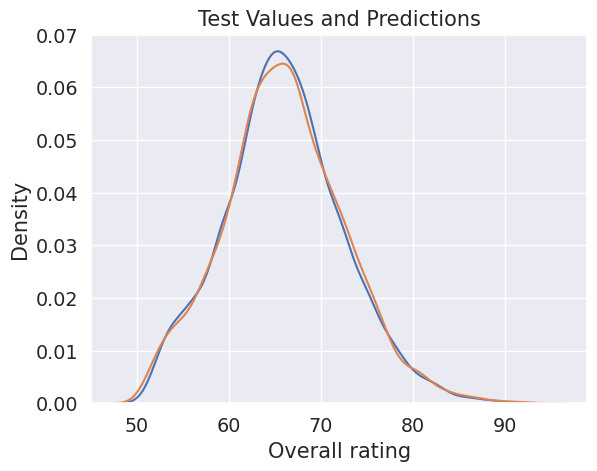

In [ ]:
#Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.xlabel('Overall rating'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

**5. Use the data from another season which was not used during the training to test how good the model is. **

In [ ]:
#QN 5

#testing how good the model is

#Check performances of the default model and best model
default_pred = default_model.predict(test_data_sc)
final_pred = final_model.predict(test_data_sc)

print('Default model performance on the test set: MAE = %0.4f.' % mae(test_dataY, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(test_dataY, final_pred))

Default model performance on the test set: MAE = 0.6932.
Final model performance on the test set:   MAE = 0.7182.


In [ ]:
#feature importance
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X_train.columns),
                                'importance': final_model.feature_importances_})

feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,value_eur,0.588719
1,movement_reactions,0.308571
2,potential,0.048400
3,wage_eur,0.016304
4,physic,0.013200
5,passing,0.007753
6,dribbling,0.006160
7,mentality_composure,0.003270
8,attacking_short_passing,0.001681
9,power_shot_power,0.001582


In [ ]:
from sklearn.metrics import r2_score

# R-squared for default model
default_r2 = r2_score(test_dataY, default_pred)

# R-squared for final model
final_r2 = r2_score(test_dataY, final_pred)

print('Default model R-squared: %0.2f' % (default_r2))
print('Final model R-squared: %0.2f' % (final_r2))

Default model R-squared: 0.97
Final model R-squared: 0.97


In [ ]:
import pickle
pickle_out = open('final_model.pkl', "wb")
pickle.dump(default_pred, pickle_out)
pickle_out.close

<function BufferedWriter.close>